https://leetcode.com/problems/sliding-window-median/description/

In [ ]:
class MedianFinder {
    multiset<int,greater<int>> decreasingL;
    multiset<int> increasingH;
public:
    MedianFinder() {
    }
    void removeNum(int x){
        if(decreasingL.count(x)) decreasingL.erase(decreasingL.find(x));
        else increasingH.erase(increasingH.find(x));
    }


    void addNum(int x) {
        //steps to always maintain an order
        decreasingL.insert(x);
        increasingH.insert(*decreasingL.begin());
        decreasingL.erase(decreasingL.begin());

        //maintain size
        if(decreasingL.size()<increasingH.size()){
            decreasingL.insert(*increasingH.begin());
            increasingH.erase(increasingH.begin());
        }
    }
    
    double findMedian() {
        return decreasingL.size()>increasingH.size()?*decreasingL.begin():(*decreasingL.begin()*0.5+*increasingH.begin()*0.5);
    }
};


In [ ]:
class Solution {
    public:
        vector<double> medianSlidingWindow(vector<int>& v, int ws) {
            MedianFinder* obj = new MedianFinder();       
            vector<double>  ans;
            int n=v.size();
            for(int i=0;i<=ws-2;i++){
                obj->addNum(v[i]);
            }
            
            for(int i=ws-1;i<n;i++){
                obj->addNum(v[i]);
                ans.push_back(obj->findMedian());                        
                obj->removeNum(v[i-ws+1]);
            }
    
            return ans; 
        }
    };

# MAANG

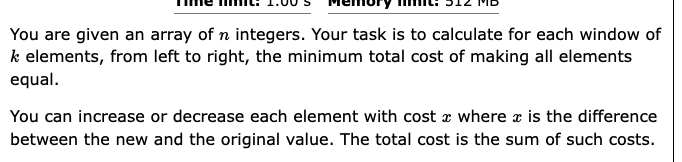

https://cses.fi/problemset/task/1077/

In [ ]:
class MedianFinder {
    multiset<int,greater<int>> decreasingL;
    multiset<int> increasingH;
    int leftSum=0,rightSum=0;
public:
    MedianFinder() {
    }
    void removeNum(int x){
        if(decreasingL.count(x)){
            leftSum-=x;
            decreasingL.erase(decreasingL.find(x));
        } 
        else{
            rightSum-=x;
            increasingH.erase(increasingH.find(x));
        } 
    }


    void addNum(int x) {
        //steps to always maintain an order
        decreasingL.insert(x);
        leftSum+=x;
        increasingH.insert(*decreasingL.begin());
        leftSum-=*(decreasingL.begin());
        rightSum+=*(decreasingL.begin());
        decreasingL.erase(decreasingL.begin());


        //maintain size
        if(decreasingL.size()<increasingH.size()){
            decreasingL.insert(*increasingH.begin());
            leftSum+=(*increasingH.begin());
            rightSum-=(*increasingH.begin());
            increasingH.erase(increasingH.begin());
        }
    }
    
    int findMedian() {
        int median=*decreasingL.begin();
        return median*(decreasingL.size()-increasingH.size())+rightSum-leftSum;
    }
};

class Solution {
    public:
        vector<int> medianSlidingWindow(vector<int>& v, int ws) {
            MedianFinder* obj = new MedianFinder();       
            vector<int>  ans;
            int n=v.size();
            for(int i=0;i<=ws-2;i++){
                obj->addNum(v[i]);
            }
            
            for(int i=ws-1;i<n;i++){
                obj->addNum(v[i]);
                ans.push_back(obj->findMedian());                        
                obj->removeNum(v[i-ws+1]);
            }
    
            return ans; 
        }
    };

void solve(){
    int n,ws;
    inp(n,ws);
    vinp(v,n);
    Solution* obj = new Solution();
    vl ans=obj->medianSlidingWindow(v,ws);
    priv(ans);
}